In [1]:
#import main_module
%run main_module_12_ch.ipynb
#%run main_module.ipynb

In [2]:
# # Перевод сигнала из файла .prs в рабочей директрории ASTRO в файл sig.txt
# !HardDecoder.exe "C:\HOLTWIN_mian\RWORK\DATA\c0000001.prs" sig.txt 

In [3]:
#import PyQt5 # для графиков в отдельных картинках
#%matplotlib qt  

%matplotlib inline

## Чтение и подготовка

In [4]:
record_3ch = record(r"sig.txt", holter_type='HE3', amplitude_convert = 330)

len: 701440


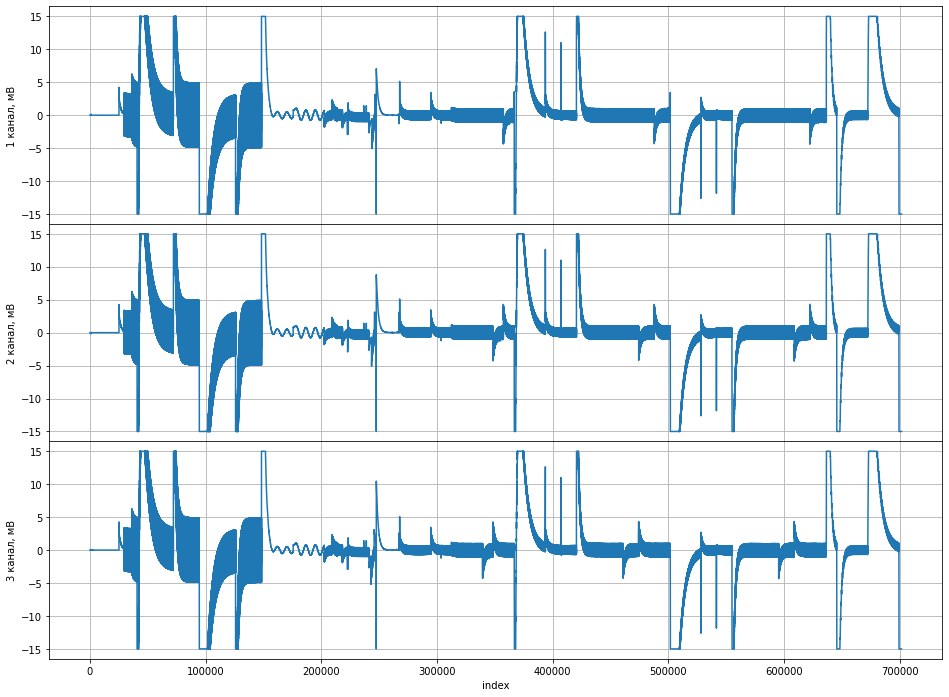

In [5]:
record_3ch.plot()

357310

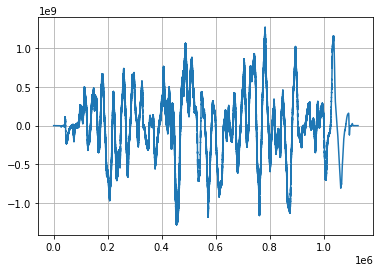

In [8]:
# Нахождение смещения относительно базовой записи
record_3ch.find_index_lag(plot_corr=True)

record_3ch.split_channels(offset=0)
record_3ch.index_lag

In [7]:
# # Построение участков
# i_seg = 17
# border = 0.2

# begin = testind_record.time_limits[i_seg][1] + testind_record.index_lag
# end = testind_record.time_limits[i_seg][2] + testind_record.index_lag
# print('Segment:' ,testind_record.time_limits[i_seg][0])
# testind_record.find_segment_limits(begin, end, border)

## Тесты

In [10]:
tests_rezult = []

Максимальный размах записи:    30.0 мВ
Максимально допустимый размах: 0.02 мВ
[30.0, 30.0, 30.0]


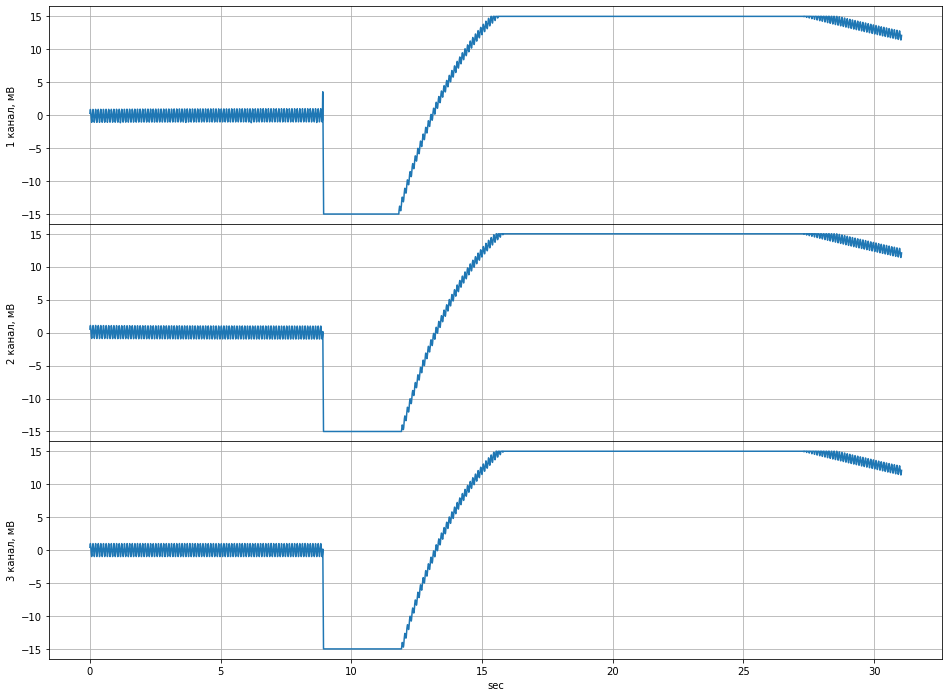

In [11]:
tests_rezult.append([ 'Nose test', nose_test(record_3ch, max_nose = 0.02, filtred=False)  ])

[1.29, 0.0, 0.0]
[1.31, 1.31, 1.31]
[1.31, 1.31, 1.31]
[1.96, 1.96, 1.96]


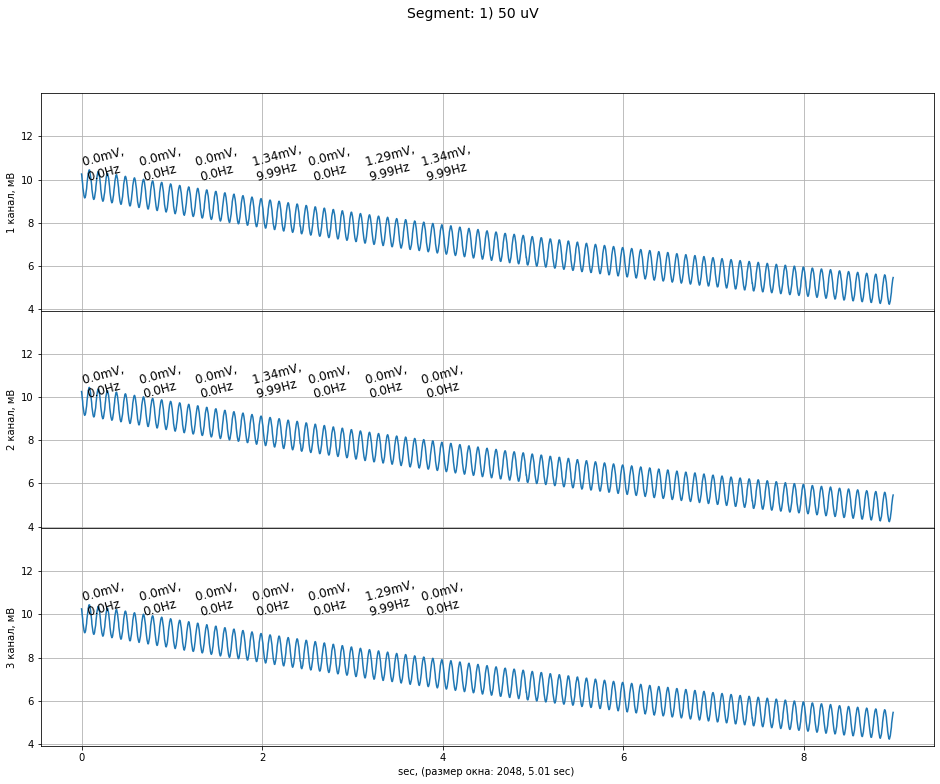

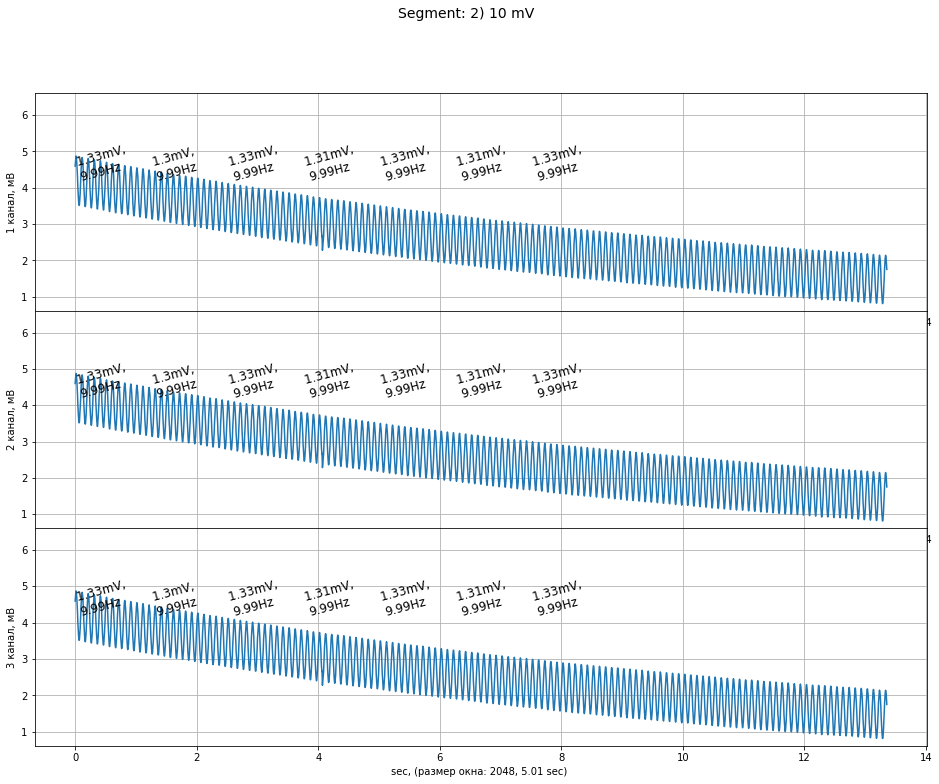

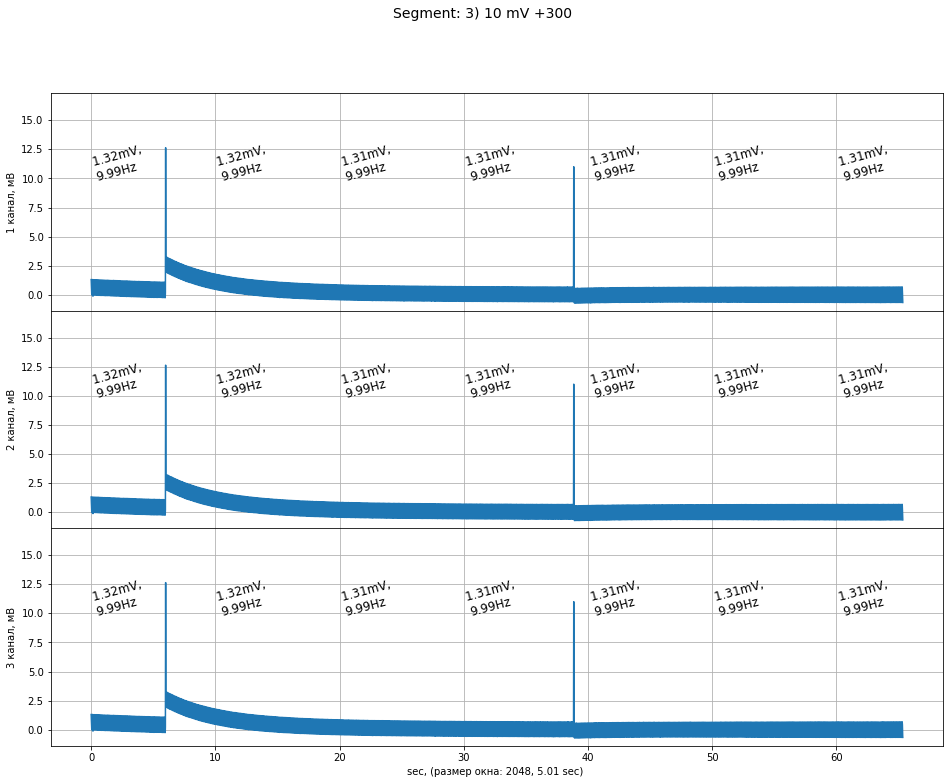

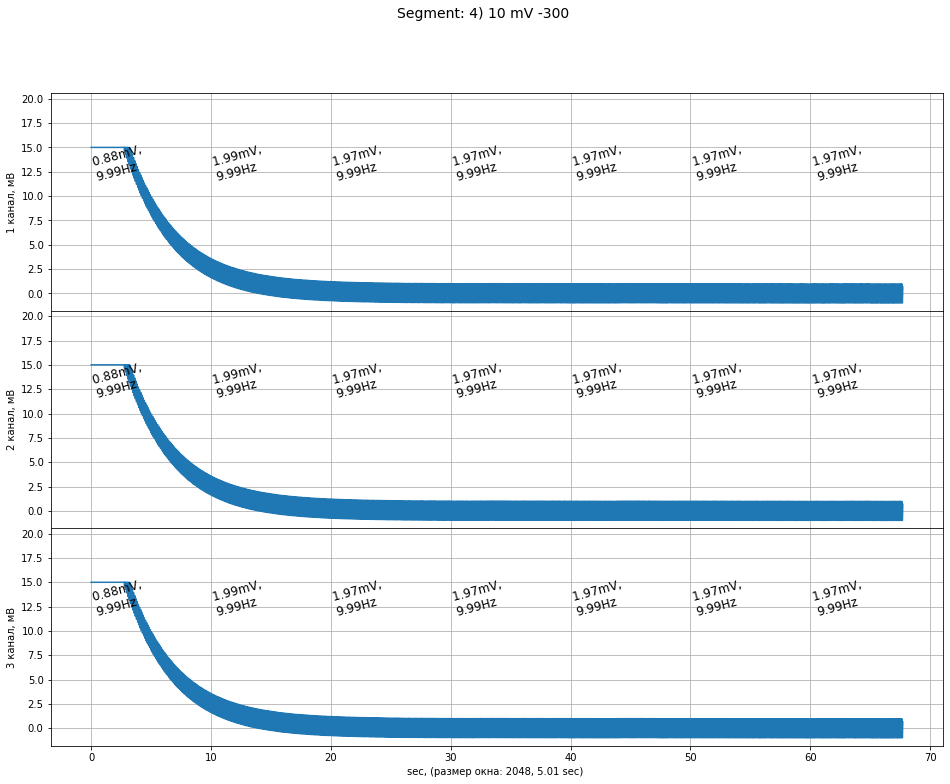

In [12]:
# Амплитуды
tests_rezult.append([ 'Amp test 50 uV' , amplitude_test_v2(record_3ch, n_seg = 1, peaks_height= 0.03) ])
tests_rezult.append([ 'Amp test 10 mV' ,amplitude_test_v2(record_3ch, n_seg = 2)])
tests_rezult.append([ 'Amp test 10 mV +300 mV' ,amplitude_test_v2(record_3ch, n_seg = 3, )])
tests_rezult.append([ 'Amp test 10 mV -300 mV' ,amplitude_test_v2(record_3ch, n_seg = 4)])

[1.96, 1.96, 1.95]
[1.97, 1.96, 1.97]
[1.97, 1.96, 1.97]


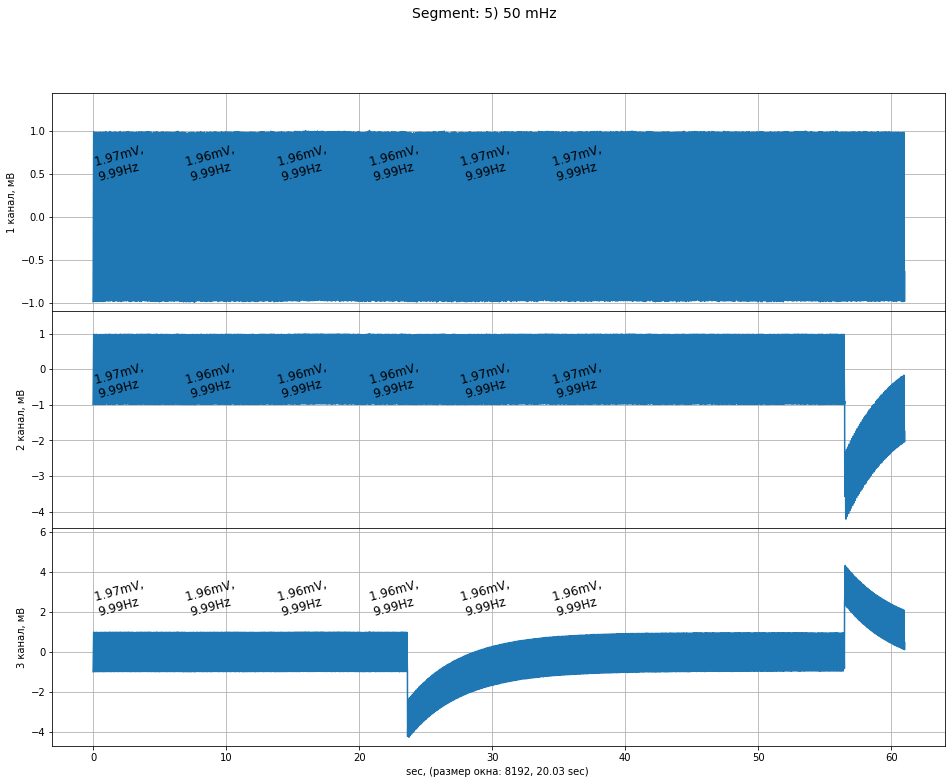

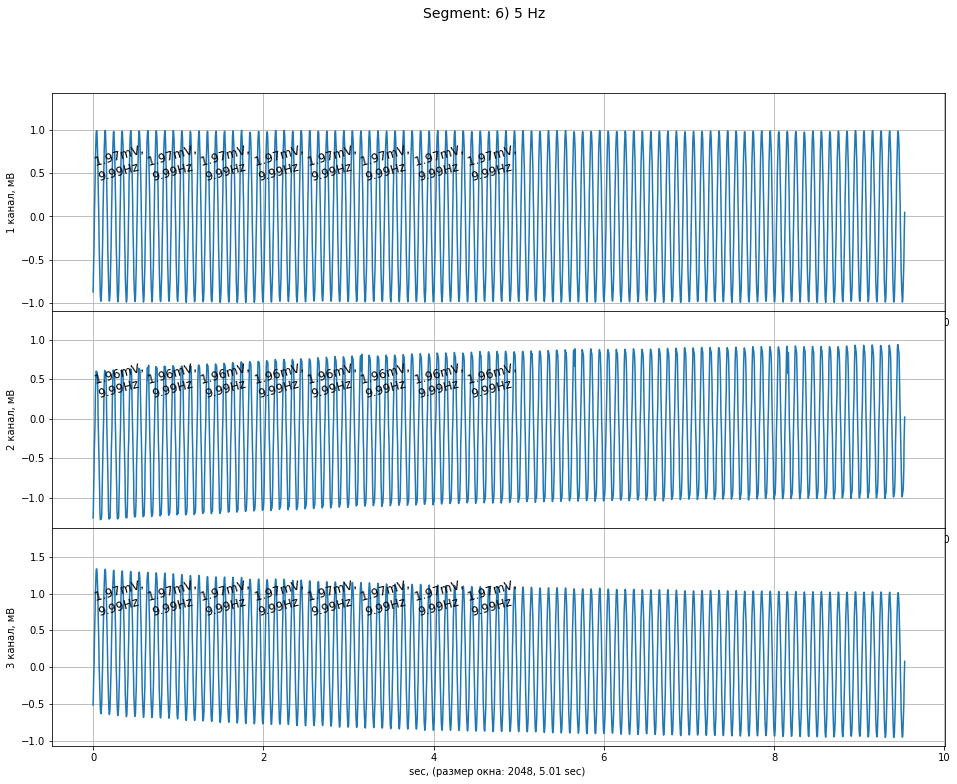

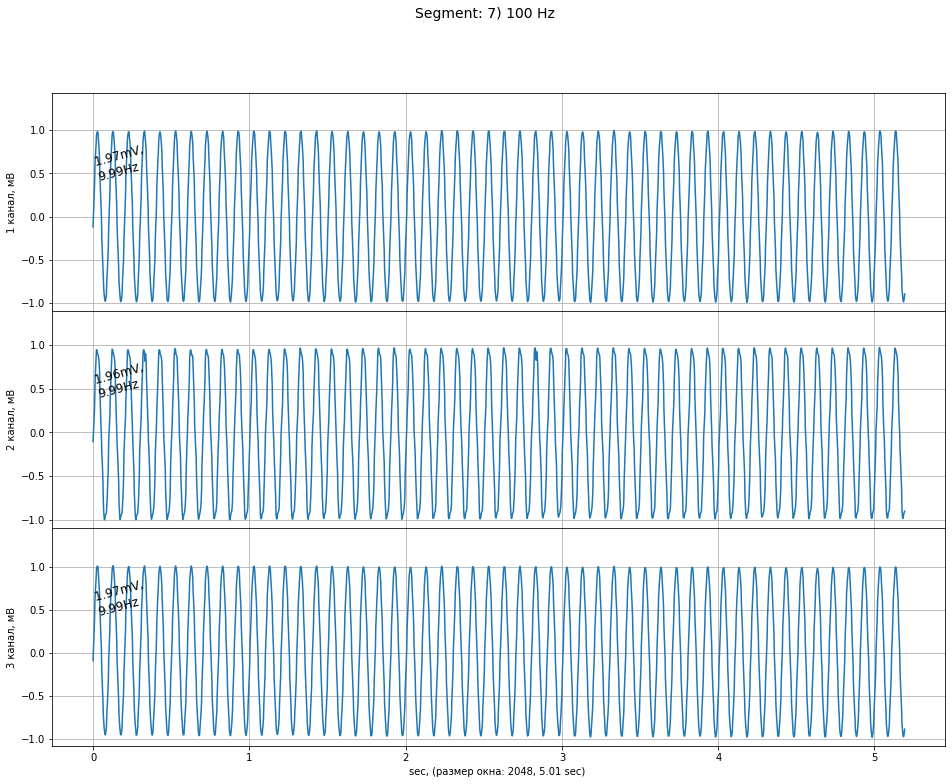

In [13]:
# Частоты
tests_rezult.append([ 'frequency response 50 mHz' ,amplitude_test_v2(record_3ch, n_seg = 5, window_size = 2**13) ])
tests_rezult.append([ 'frequency response 5 Hz' ,amplitude_test_v2(record_3ch, n_seg = 6)])
tests_rezult.append([ 'frequency response 100 mHz' ,amplitude_test_v2(record_3ch, n_size = 1, n_seg = 7)])

ValueError: max() arg is an empty sequence

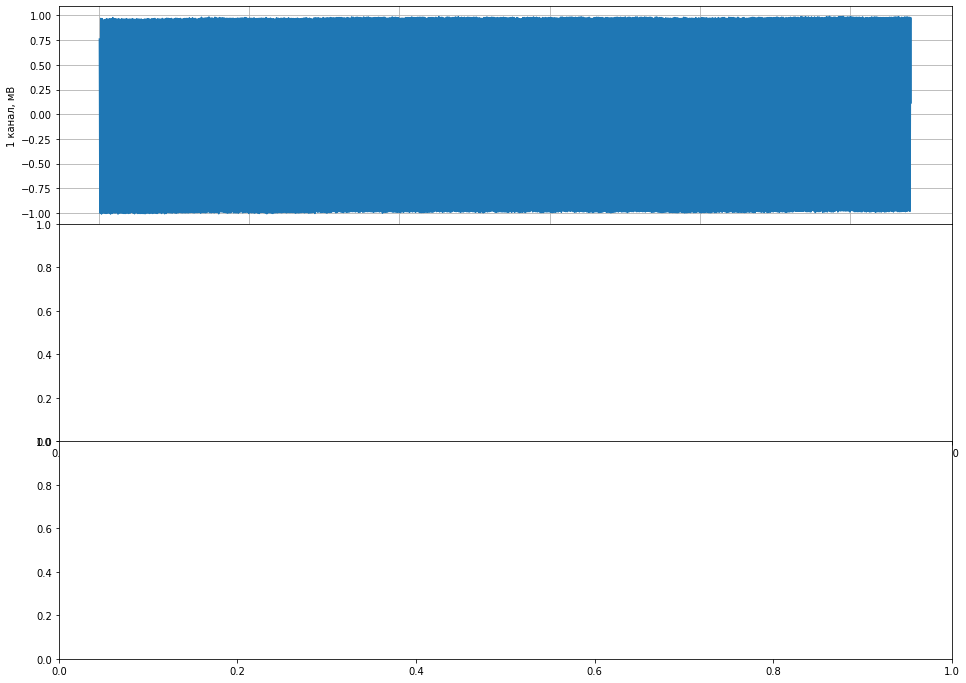

In [14]:
tests_rezult.append([ 'ECG test' ,ECG_test(record_3ch)])

Segment: 10) Доп. ток
1 канал, max = 2.036 мВ, min = -3.258 мВ
2 канал, max = 2.036 мВ, min = -3.258 мВ
3 канал, max = 2.038 мВ, min = -3.256 мВ
Прохождение испытания: False


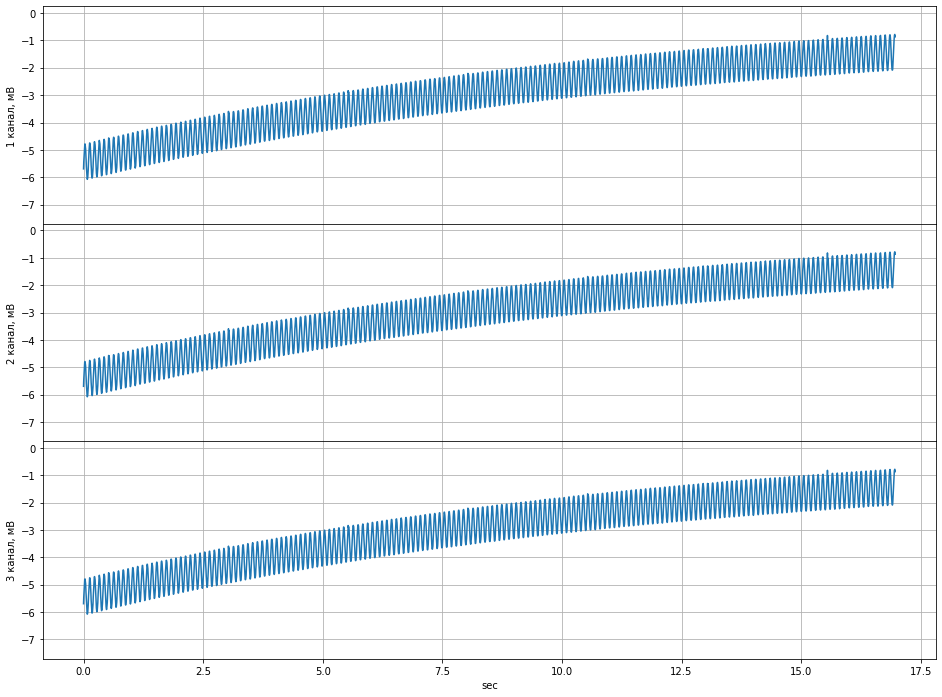

In [15]:
tests_rezult.append([ 'Doptok_test' ,doptok_test(record_3ch)])

[[1, 1], [23522, 3], [12, 12]]


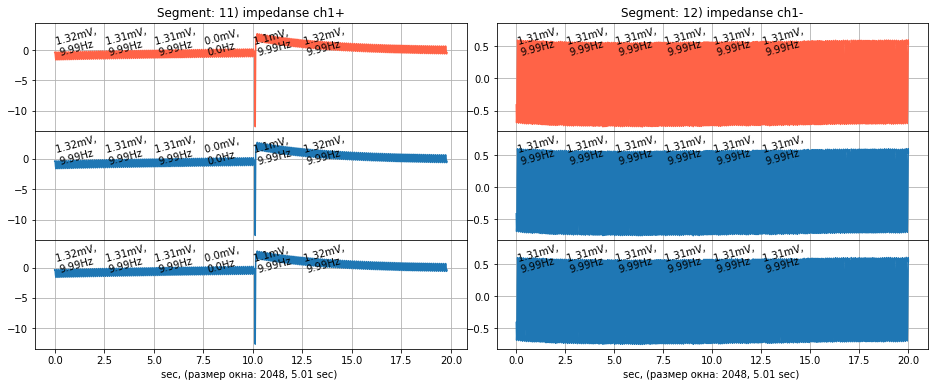

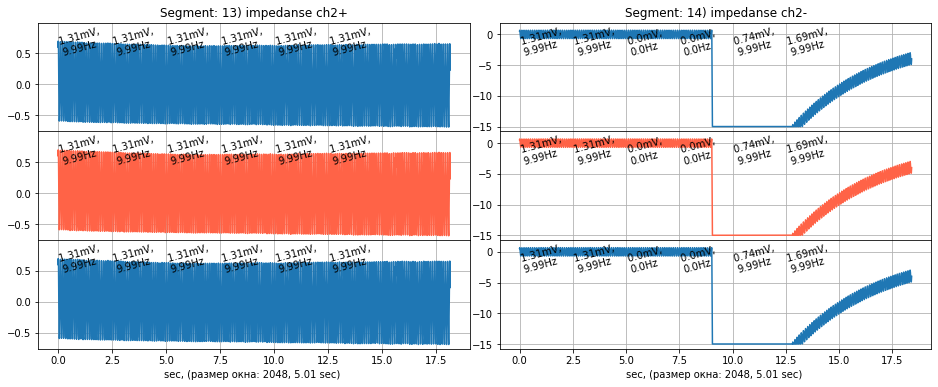

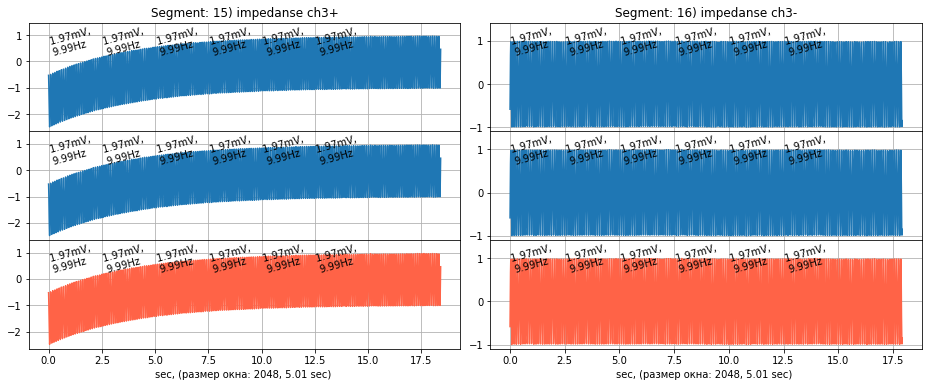

In [16]:
tests_rezult.append([ 'impedanse_test' ,impedanse_test(record_3ch, start_n_seg = 11)])

[[195, 150], [229, 103], [252, 92]]


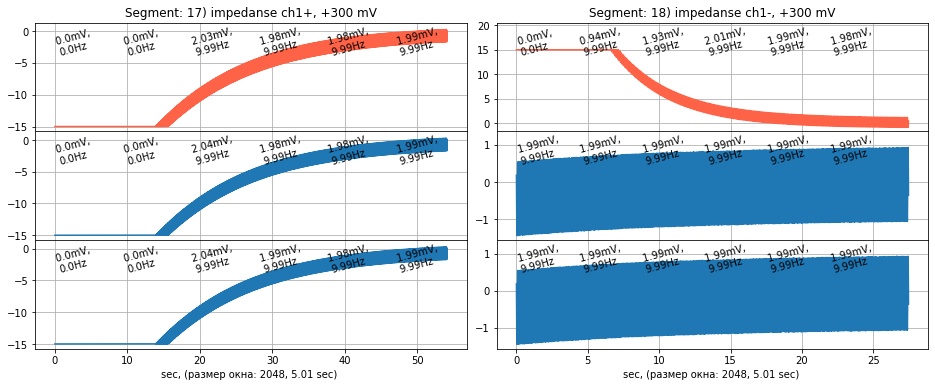

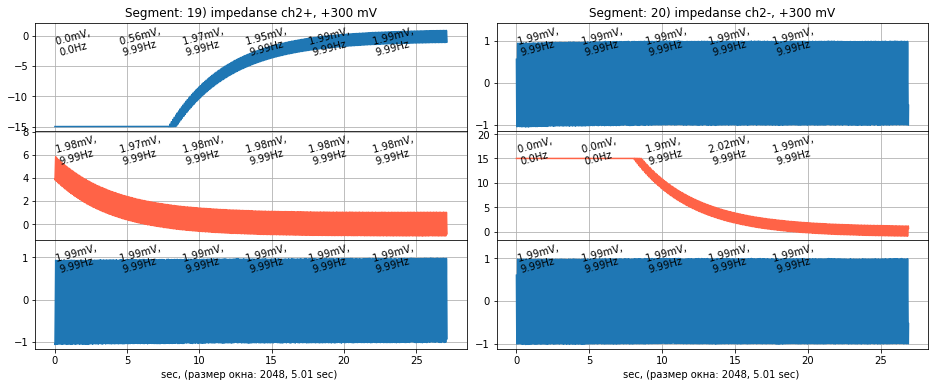

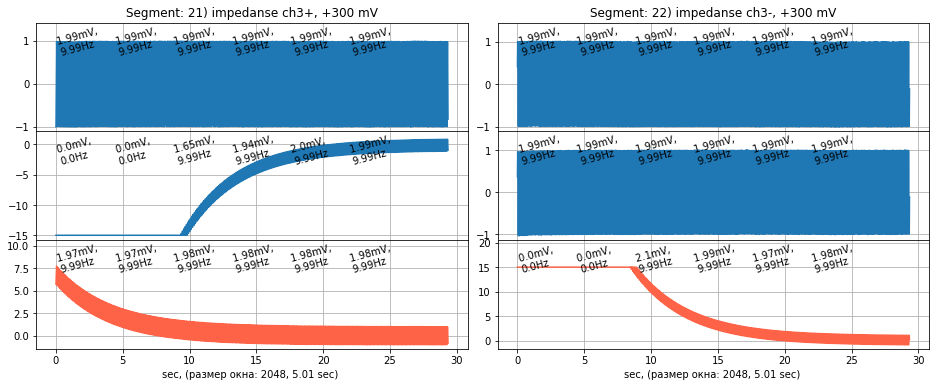

In [15]:
tests_rezult.append([ 'impedanse_test +300 mV' ,impedanse_test(record_3ch, start_n_seg = 17)])

[[157, 96], [236, 130], [223, 88]]


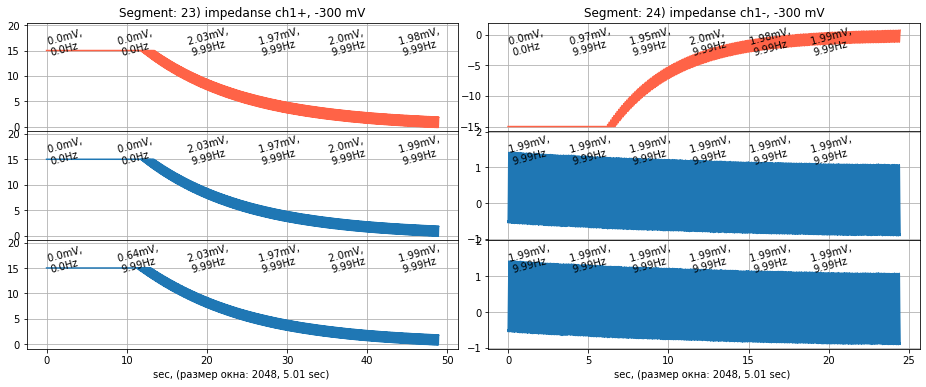

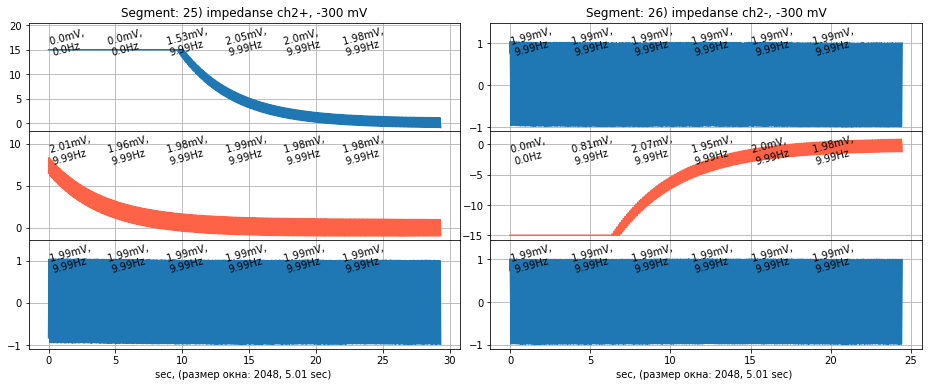

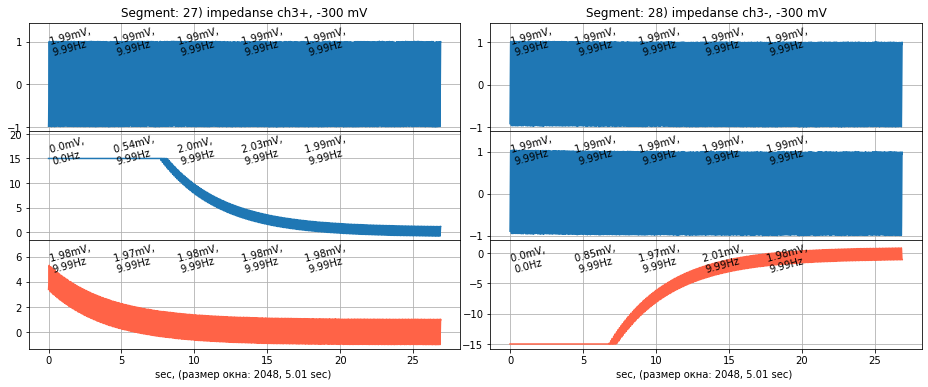

In [16]:
tests_rezult.append([ 'impedanse_test -300 mV' ,impedanse_test(record_3ch, start_n_seg = 23)])

In [17]:
print_rezult(tests_rezult)

Шум                    : True [0.009, 0.012, 0.012]

Амплитуда 50 мкВ       : True [0.05, 0.05, 0.05]
Амплитуда 10 мВ        : True [9.87, 9.87, 9.87]
Амплитуда 10 мВ +300 мВ: True [9.87, 9.87, 9.87]
Амплитуда 10 мВ -300 мВ: True [9.87, 9.87, 9.87]

АЧХ 50 мГц             : True [1.57, 1.57, 1.57]
АЧХ 5 Гц               : True [1.99, 1.99, 1.99]
АЧХ 100 Гц             : False [1.38, 1.38, 1.38]

ЭКГ                    : True
Доп. ток               : True

Импеданс               : True [[182, 155], [173, 159], [155, 99]]
Импеданс +300 мВ       : True [[195, 150], [229, 103], [252, 92]]
Импеданс -300 мВ       : True [[157, 96], [236, 130], [223, 88]]

Время окончания: 16:00:39
